## Import libs and data

In [1]:
import pandas as pd
import re
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
tqdm.pandas()
import pickle
import datetime

In [2]:
df_post = pd.read_csv('../out/df_post.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
with open('../out/tokens_post.txt', 'rb') as fp:   #Pickling
    tokens_post = pickle.load(fp)

In [4]:
len(tokens_post), len(df_post)

(417279, 417279)

## Calculate sentiment score and clean

In [5]:
df_post['sentiment'] = df_post.sent_score.apply(lambda x:'positive' if x>0 else 'negative' if x<0 else 'neutral')

In [6]:
index_drp = df_post.loc[df_post.post_date.isna()].index.values

# drop original topic from top_df
df_post.drop(index_drp,inplace=True)

# drop from input list
for index in sorted(index_drp, reverse=True):
    del tokens_post[index]

In [7]:
len(tokens_post), len(df_post)

(417279, 417279)

In [8]:
print(len(tokens_post), len(df_post))
index_drp = df_post.loc[df_post.post_date.apply(len)!=19].index.values

# drop original topic from top_df
df_post.drop(index_drp,inplace=True)

# drop from input list
for index in sorted(index_drp, reverse=True):
    del tokens_post[index]
    
print(len(tokens_post), len(df_post))

417279 417279
417092 417092


In [9]:
df_post['post_date'] = pd.to_datetime(df_post['post_date'],errors='coerce')

In [10]:
print(len(tokens_post), len(df_post))
index_drp = df_post.loc[df_post.post_date.isna()].index.values

# drop original topic from top_df
df_post.drop(index_drp,inplace=True)

# drop from input list
for index in sorted(index_drp, reverse=True):
    del tokens_post[index]
    
print(len(tokens_post), len(df_post))

417092 417092
417086 417086


In [11]:
df_post.post_date.describe()

count                  417086
unique                 416447
top       2017-06-26 14:49:07
freq                        4
first     2012-12-15 13:58:40
last      2018-12-11 00:08:14
Name: post_date, dtype: object

## check point

In [14]:
df_post.to_csv('../out/df_post.csv',index=False)
with open('../out/tokens_post.txt', 'wb') as fp:   #Pickling
    pickle.dump(tokens_post,fp)

In [ ]:
df_post = pd.read_csv('../out/df_post.csv')
with open('../out/tokens_post.txt', 'rb') as fp:   #Un-pickling
    tokens_post = pickle.load(fp)

## Input to program
1) Key words<br>
2) As of date<br>
3) Window length<br>

In [13]:
# IDEA: -> add useful statistic like lift for keywords co-occurence
# analyse keyword x tags
# use word vector to explore neighbor words

## Base sentiment query

Total posts: 659
Total mentions: 62 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  app.launch_new_instance()


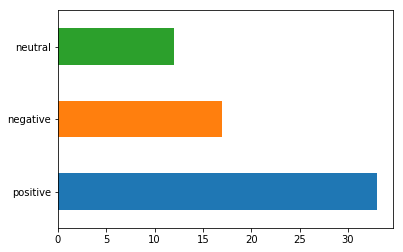

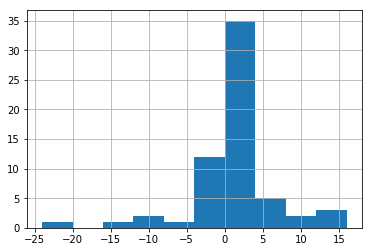

sentiment score:16
Nsr150R (2532) ตาเหลียมกับการ All New Sticker ของทาง Honda Nsr150R (2532) ตาเหลียมกับการ All New Sticker ของทาง Hondaที่มา2tspecมาช้าแต่มานะ !!! สำหรับค่ายคนดี โดยหลังจากปล่อยให้คู่แข่งอย่าง Suzuki RGV-S และ Yamaha VR150 ทำตลาดรถจักรยานยนต์สปอรต์ขนาด 150cc ไปก่อนหน้านี้ บวกกับทิศทางตลาดที่รถทรงผู้ชายอย่างเจ้า Honda Fighter 135 ไม่สดใสเหมือนแต่ก่อน รวมไปถึงไม่อาจสามารถต่อกรกับ 150cc อีกสองค่ายได้แล้ว ทำให้การมาในครั้งนี้ของ Honda บอกเลยว่าเจ้า NSR150R ไม่ธรรมดาสำหรับความคิดของส่วนตัวของผู้เขียนหลังจากศึกษาข้อมูลของ RGV-S (รุ่นแรก 2528) และ VR150 (รุ่นแรก 2530) ผู้เขียนสามารถบอกได้เลยว่าทาง Honda มีตั้งใจเป็นอย่างมากในการสร้างสรรค์ Nsr150Rที่มา2tspecหากจะไล่เรียงหาถึงจุดถือกำเนิดของต้นตระกูล NSR ต้องย้อนวันเวลากลับไปในวันที่ 25 พฤษภาคม 2527 (1984) ทางค่าย Honda ได้ทำการเปิดตัวตัวรถจักรยานยนต์สปอร์ตที่มีประสิทธิภาพสูงมีรหัสว่า NS250F และ NS250R โดย NS250F/R ได้กลายเป็นต้นตระกูล NSR ขนาดความจุ 250cc รุ่นแรก ก่อนจะถูกพัฒนาต่อไปจนเป็น NSR250R (Mc16) ปี 1987NS250F และ NS250

In [11]:
kws = ['suzuki']
dt = datetime.date(2018,11,1)
win_len = 365

idxs=[]
for i,tkn in enumerate(tokens_post):
    for kw in kws:
        if kw in tkn:
            idxs.append(i)
            break

df_temp = df_post.copy()
df_temp = df_temp.iloc[idxs]
print('Total posts:',len(df_temp))
# filter by datetime
df_temp = df_temp.loc[(df_temp.post_date < dt)&\
                      (dt - df_temp.post_date.dt.date < datetime.timedelta(days=win_len))]
print('Total mentions:',len(df_temp),'\n')
_=df_temp.sentiment.value_counts().plot('barh')
plt.show()
_=df_temp['sent_score'].hist()
plt.show()
# show top 5 positive and negative posts
for row in df_temp.sort_values('sent_score',ascending=False).head(5)[['title-content','sent_score']].iterrows():
    print('sentiment score:' + str(row[1]['sent_score'] )+ '\n' + row[1]['title-content']+'\n')

print('##############################################################################################################')

for row in df_temp.sort_values('sent_score',ascending=True).head(5)[['title-content','sent_score']].iterrows():
    print('sentiment score:' + str(row[1]['sent_score'] )+ '\n' + row[1]['title-content']+'\n')

## Visualize sentiment through time

In [13]:
df_post.post_date.dtype

dtype('<M8[ns]')

In [34]:
# extract month-year and year from date time
df_post['month-year'] = df_post.post_date.progress_apply(lambda x:datetime.date(x.year,x.month,1))



  0%|          | 0/417086 [00:00<?, ?it/s]

  0%|          | 1/417086 [00:02<334:21:52,  2.89s/it]

 17%|█▋        | 71813/417086 [00:02<193:45:23,  2.02s/it]

 36%|███▌      | 148871/417086 [00:03<105:21:35,  1.41s/it]

 56%|█████▌    | 232201/417086 [00:03<50:50:18,  1.01it/s] 

 76%|███████▌  | 316573/417086 [00:03<19:20:48,  1.44it/s]

 96%|█████████▋| 401457/417086 [00:03<2:06:20,  2.06it/s] 

100%|██████████| 417086/417086 [00:03<00:00, 121164.02it/s]

In [36]:
df_post['year'] = df_post.post_date.dt.year

In [50]:
kws = ['suzuki']

idxs=[]
for i,tkn in enumerate(tokens_post):
    for kw in kws:
        if kw in tkn:
            idxs.append(i)
            break

# copy and filter
df_temp = df_post.copy()
df_temp = df_temp.iloc[idxs]

# aggregate
df_temp_mo = df_temp.groupby(['month-year','sentiment'])['sent_score'].count().reset_index()
df_temp_y = df_temp.groupby(['year','sentiment'])['sent_score'].count().reset_index()

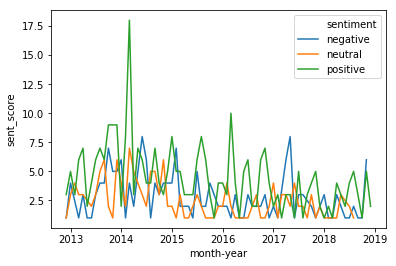

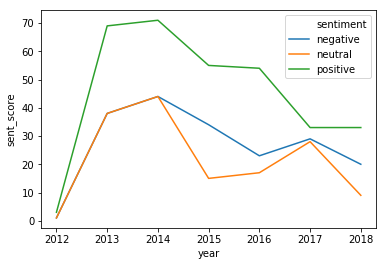

In [52]:
_ = sns.lineplot(x='month-year', y='sent_score', hue='sentiment',data=df_temp_mo)
plt.show()
_ = sns.lineplot(x='year', y='sent_score', hue='sentiment',data=df_temp_y)
plt.show()

## sentiment by user

In [56]:
kws = ['suzuki']
dt = datetime.date(2018,12,1)
win_len = 365

idxs=[]
for i,tkn in enumerate(tokens_post):
    for kw in kws:
        if kw in tkn:
            idxs.append(i)
            break

df_temp = df_post.copy()
df_temp = df_temp.iloc[idxs]
print('Total posts: ',len(df_temp))
# filter by datetime
df_temp = df_temp.loc[(df_temp.post_date < dt)&\
                      (dt - df_temp.post_date.dt.date < datetime.timedelta(days=win_len))]
print('Total mentions: ',len(df_temp))

print('Total unique user: ',df_temp.user_id.nunique())

Total posts:  659
Total mentions:  66
Total unique user:  50


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  app.launch_new_instance()


In [58]:
df_temp['user_id'] = df_temp['user_id'].astype(int)

In [63]:
# visualize engagement by top user
df_temp_user = df_temp.groupby('user_id')['sentiment'].count().reset_index().sort_values('sentiment',ascending=False)

In [65]:
df_temp_user.rename({'sentiment':'total_post'},axis=1,inplace=True)

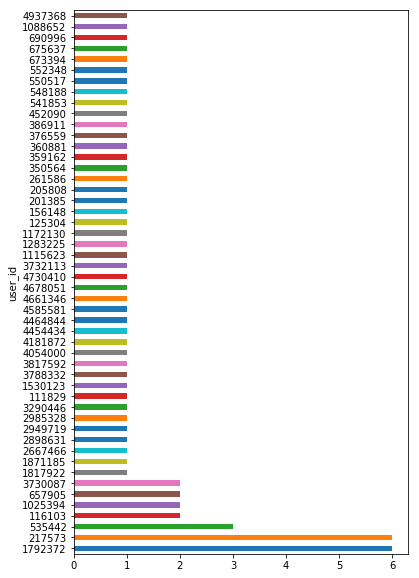

In [78]:
_ = df_temp_user.plot(x='user_id',y='total_post',kind='barh',legend=False,figsize=(6,10))

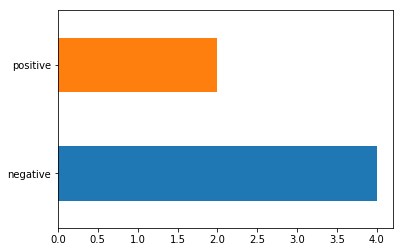

In [86]:
# single user view
user_id = 1792372
df_temp_1u = df_temp.loc[df_temp.user_id == user_id]

_ = df_temp_1u.sentiment.value_counts().plot('barh')